# Evaluate Simulated encounters versus Mercy health data using a co-occurence conditional probability matrix 

Disease and findings states appearing in encounters are tallied  pair-wise, to compute the probability of one state given another. This appears as a square matrix for all combinations of diseases and findings.  A comparision of this matrix for the states common between simulated and real data measures the accuracy of the simulation's co-morbidity model.

JMA July 2021

In [1]:
import os, re, sys
import math
from pathlib import Path
import numpy as np
import pandas as pd

In [29]:
MATRIX_DIR = '.'
simulated_m = pd.read_csv('simulated_confidence_matrix_smoothed.csv') 
real_m = pd.read_csv('real_confidence_matrix_smoothed.csv')

In [80]:
real_m.head()

,Acidosis (disorder),Acquired absence of organ (disorder),Acute Cholecystitis,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute deep venous thrombosis (disorder),Acute exacerbation of chronic obstructive airways disease (disorder),Acute pulmonary embolism (disorder),Acute respiratory distress syndrome (disorder),Acute respiratory failure (disorder),...,Smokes tobacco daily,Sore throat symptom (finding),Streptococcal sore throat (disorder),Stroke,Tubal pregnancy,Urinary tract infectious disease (disorder),Ventricular tachycardia (disorder),Viral sinusitis (disorder),Vomiting symptom (finding),Wheezing (finding)
0,0.000000,0.000875,0.005065,0.000203,0.147228,0.009418,0.159635,0.021582,0.013832,0.403503,...,0.221004,0.002441,0.000956,0.133680,0.000010,0.168565,0.030959,0.001220,0.013852,0.067593
1,0.112861,0.000000,0.018373,0.000010,0.078740,0.000010,0.057743,0.028871,0.018373,0.081365,...,0.107612,0.018373,0.000010,0.104987,0.000010,0.249344,0.015748,0.000010,0.023622,0.065617
2,0.149639,0.004207,0.000000,0.000010,0.071514,0.007812,0.051683,0.025841,0.006611,0.213942,...,0.206130,0.004808,0.000010,0.105168,0.000010,0.105168,0.022837,0.003606,0.012019,0.060096
3,0.038911,0.000010,0.000010,0.000000,0.171206,0.031128,0.038911,0.000010,0.000010,0.070039,...,0.217899,0.038911,0.000010,0.070039,0.000010,0.097276,0.000010,0.879377,0.023346,0.124514
4,0.033299,0.000138,0.000547,0.000202,0.000000,0.002001,0.110350,0.005792,0.002070,0.077617,...,0.203982,0.010094,0.003662,0.057310,0.000097,0.059334,0.005783,0.003119,0.010071,0.713124


In [81]:
simulated_m.head()

,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute deep venous thrombosis (disorder),Acute pulmonary embolism (disorder),Acute respiratory distress syndrome (disorder),Acute respiratory failure (disorder),Acute viral pharyngitis (disorder),Alcoholism,Alzheimer's disease (disorder),Anemia (disorder),...,Sinusitis (disorder),Smokes tobacco daily,Sore throat symptom (finding),Streptococcal sore throat (disorder),Stroke,Tubal pregnancy,Urinary tract infectious disease (disorder),Viral sinusitis (disorder),Vomiting symptom (finding),Wheezing (finding)
0,0.000000,0.003886,0.002691,0.004783,0.004783,0.006577,0.004783,0.014649,0.039462,0.350075,...,0.000010,0.018834,0.003587,0.001794,0.051121,0.031689,0.000010,0.000010,0.000010,0.005680
1,0.000693,0.000000,0.000480,0.000587,0.002719,0.001226,0.000747,0.007412,0.003093,0.303295,...,0.000373,0.011571,0.001440,0.000640,0.034286,0.025861,0.000533,0.001280,0.000693,0.001813
2,0.002785,0.002785,0.000000,0.000010,0.611077,0.825804,0.004641,0.009282,0.062191,0.440285,...,0.002785,0.015470,0.129950,0.002166,0.118193,0.033725,0.000010,0.007735,0.071782,0.371597
3,0.005099,0.003505,0.000010,0.000000,0.602613,0.828553,0.003505,0.019439,0.046526,0.435309,...,0.001912,0.015296,0.155832,0.000010,0.115360,0.032505,0.002231,0.006055,0.071702,0.369662
4,0.002512,0.008006,0.310047,0.296860,0.000000,0.680063,0.003611,0.012402,0.047881,0.477080,...,0.001727,0.019152,0.093564,0.002041,0.103768,0.031868,0.000010,0.010675,0.048823,0.256201


In [30]:
# Columns in one matrix and not in the other
real_cols = set(real_m.columns)
sim_cols = set(simulated_m.columns)
# Use this list as the common row and column index
common_cols = sorted(list(real_cols.intersection(sim_cols)))
common_len = len(common_cols)
common_len, len(real_cols.difference(sim_cols)), len(sim_cols.difference(real_cols))

(103, 28, 0)

In [91]:
# Need to subset and sort each matrix row and column. 
def subset_matrix_by_index_labels(new_labels, square_df):
    sh = square_df.shape
    if sh[0] != sh[1]:
        print('Matrix is not square')
        return None
    # Apply the collumn index to the rows
    new_index = square_df.columns
    old_index = square_df.index
    square_df = square_df.rename(index=dict(zip(old_index, new_index)))
    # subset the rows
    square_df = square_df.loc[new_labels,:]
    square_df = square_df.sort_index(axis=0)
    # then the columns
    square_df = square_df[new_labels]
    square_df = square_df.sort_index(axis=1)
    return square_df


In [96]:
sim_common_m = subset_matrix_by_index_labels(common_cols, simulated_m)
np.fill_diagonal(sim_common_m.values, np.NaN)
print(sim_common_m.shape)

(103, 103)


In [98]:
#  Create a real matrix with only columns from the simulated matrix
real_common_m = subset_matrix_by_index_labels(common_cols, real_m)
np.fill_diagonal(real_common_m.values, np.NaN)
print(real_common_m.shape)

(103, 103)


In [99]:
diff_common_m = real_common_m.values - sim_common_m.values
chisq = (diff_common_m * diff_common_m)/ real_common_m
np.nanmean(chisq.values)

190.05796087198112

In [113]:
def kl_div( mat_P, mat_Q):
    return np.nansum(np.multiply(mat_P, (np.log(mat_P) - np.log(mat_Q))))
kl_div(real_common_m, sim_common_m)

2705.112919224967

(array([ 2.,  1.,  6.,  4.,  6., 17., 46.,  9.,  9.,  3.]),
 array([-38.96016815, -33.12018553, -27.2802029 , -21.44022028,
        -15.60023766,  -9.76025504,  -3.92027242,   1.9197102 ,
          7.75969282,  13.59967545,  19.43965807]),
 <BarContainer object of 10 artists>)

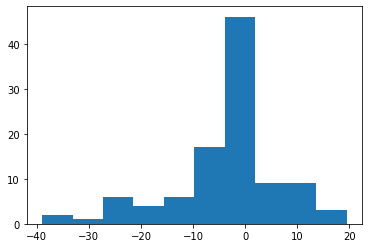

In [119]:
import matplotlib.pyplot as plt
plt.hist(np.nansum(diff_common_m, axis=0))


In [120]:
simulated_m.columns

Index(['Acute bacterial sinusitis (disorder)', 'Acute bronchitis (disorder)',
       'Acute deep venous thrombosis (disorder)',
       'Acute pulmonary embolism (disorder)',
       'Acute respiratory distress syndrome (disorder)',
       'Acute respiratory failure (disorder)',
       'Acute viral pharyngitis (disorder)', 'Alcoholism',
       'Alzheimer's disease (disorder)', 'Anemia (disorder)',
       ...
       'Sinusitis (disorder)', 'Smokes tobacco daily',
       'Sore throat symptom (finding)', 'Streptococcal sore throat (disorder)',
       'Stroke', 'Tubal pregnancy',
       'Urinary tract infectious disease (disorder)',
       'Viral sinusitis (disorder)', 'Vomiting symptom (finding)',
       'Wheezing (finding)'],
      dtype='object', length=103)